In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the numpy, pandas, datetime, matplotlib, & seaborn packages

import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set_style('whitegrid')
sns.set_style("whitegrid", {'axes.grid' : False})

### Data Sourcing, Cleaning and Preparation ...

Read the uber data, inspect, clean and manipulate the data ..

In [3]:
# Read the uber data in to a dataframe. 
# Convert the date fields to date time and since the date in the source data has different formats and it is possible for the 
# day and month to be interchanged , have specified dayfirst to True.

uber = pd.read_csv('D:\\Individual-Assignments\\eda_data_visualizing\\Uber Request Data.csv', parse_dates=[
                'Request timestamp','Drop timestamp'], dayfirst=True)
uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47


In [4]:
# inspect uber dataframe

print("*********************************  Info *******************************************") 
print(uber.info())
print("*********************************  Shape ******************************************") 
print(uber.shape)
print("**************************** Columns having null values *****************************")
print(uber.isnull().any())
print("**************************** Describe *****************************")
uber.describe()

*********************************  Info *******************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null datetime64[ns]
Drop timestamp       2831 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.2+ KB
None
*********************************  Shape ******************************************
(6745, 6)
**************************** Columns having null values *****************************
Request id           False
Pickup point         False
Driver id             True
Status               False
Request timestamp    False
Drop timestamp        True
dtype: bool
**************************** Describe *****************************


,Request id,Driver id
count,6745.000000,4095.000000
mean,3384.644922,149.501343
std,1955.099667,86.051994
min,1.000000,1.000000
25%,1691.000000,75.000000
50%,3387.000000,149.000000
75%,5080.000000,224.000000
max,6766.000000,300.000000


In [5]:
# Convert driver id field from float to int and replace the nan values to 0.This field will not be used for any computation and
# hence no harm in imputing the values to 0.

uber['Driver id'] = uber[['Driver id']].fillna(0).astype(int)
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            6745 non-null int32
Status               6745 non-null object
Request timestamp    6745 non-null datetime64[ns]
Drop timestamp       2831 non-null datetime64[ns]
dtypes: datetime64[ns](2), int32(1), int64(1), object(2)
memory usage: 289.9+ KB


In [6]:
# check null rows in each column

round(100*(uber.isnull().sum()/len(uber.index)), 2)

Request id            0.00
Pickup point          0.00
Driver id             0.00
Status                0.00
Request timestamp     0.00
Drop timestamp       58.03
dtype: float64

In [7]:
# Remove Drop timestamp column as we will not be using it for any calculations. Hence safe to remove.

uber = uber.drop(['Drop timestamp'], axis=1) 
round(100*(uber.isnull().sum()/len(uber.index)), 2)

Request id           0.0
Pickup point         0.0
Driver id            0.0
Status               0.0
Request timestamp    0.0
dtype: float64

In [8]:
# Create a new column called request hour from the request timestamp column

uber['Request hour'] = uber['Request timestamp'].apply(lambda x: x.strftime('%H'))
uber['Request hour'] =  uber['Request hour'].astype(int)
uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Request hour
0,619,Airport,1,Trip Completed,2016-07-11 11:51:00,11
1,867,Airport,1,Trip Completed,2016-07-11 17:57:00,17
2,1807,City,1,Trip Completed,2016-07-12 09:17:00,9
3,2532,Airport,1,Trip Completed,2016-07-12 21:08:00,21
4,3112,City,1,Trip Completed,2016-07-13 08:33:16,8


In [9]:
# Create a new column from the hours column with the following assumptions
# 4:00 Am to 7:59Am is Early morning
# 8:00 AM to 11:59 is Morning
# 12:00 to 15:59 is Afternoon
# 16:00 to 19:59 is Evening
# 20:00 to 23:59 is Night
# 24:00 to 3:59 AM is late Night

def timeslot(x):
    if x >= 4 and x < 8:
        return 'Early Morning'
    elif x >= 8 and x < 12:
        return 'Morning'
    elif x >= 12 and x < 16:
        return 'Afternoon'
    elif x >= 16 and x < 20:
        return 'Evening'
    elif x >= 20:
        return 'Night'
    elif x >= 0 and x < 4:
        return 'Late Night'
    
uber['Request timeslot'] = uber['Request hour'].apply(timeslot)
uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Request hour,Request timeslot
0,619,Airport,1,Trip Completed,2016-07-11 11:51:00,11,Morning
1,867,Airport,1,Trip Completed,2016-07-11 17:57:00,17,Evening
2,1807,City,1,Trip Completed,2016-07-12 09:17:00,9,Morning
3,2532,Airport,1,Trip Completed,2016-07-12 21:08:00,21,Night
4,3112,City,1,Trip Completed,2016-07-13 08:33:16,8,Morning


In [10]:
# Create a new column called day of week and fetch the day of week from the request date time column

uber['Request dayofweek'] = uber['Request timestamp'].dt.day_name()
uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Request hour,Request timeslot,Request dayofweek
0,619,Airport,1,Trip Completed,2016-07-11 11:51:00,11,Morning,Monday
1,867,Airport,1,Trip Completed,2016-07-11 17:57:00,17,Evening,Monday
2,1807,City,1,Trip Completed,2016-07-12 09:17:00,9,Morning,Tuesday
3,2532,Airport,1,Trip Completed,2016-07-12 21:08:00,21,Night,Tuesday
4,3112,City,1,Trip Completed,2016-07-13 08:33:16,8,Morning,Wednesday


### Data Analysis :

<b>Step 1 - Analyse the number of requests for all Trip Status ( Trip Completed, Cancelled and No Cars Available)      
        

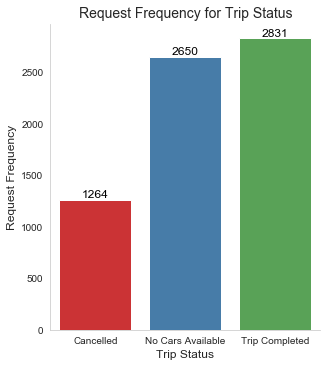

In [11]:
order_status = uber['Status'].sort_values(ascending = True).unique().tolist()
plot = sns.catplot(x="Status", kind="count", data=uber, palette="Set1", aspect= .9, order=order_status);

plt.title('Request Frequency for Trip Status', fontsize = 14)
plt.xlabel("Trip Status", fontsize = 12)
plt.ylabel("Request Frequency", fontsize = 12)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='black', ha='center', 
             va='bottom')

plt.show()

The above graph shows that amongst the trip status 'Cancelled' and 'No Cars Available', more number of requested cars are 
unavailable as opposed to cancelled by the driver

<b>Step 2 - Identify the number of requests for trips originating from airport and city for all the 3 trip status.

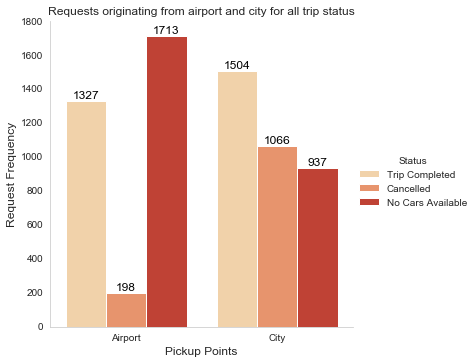

In [12]:
plot = sns.catplot(x="Pickup point", hue="Status", palette='OrRd', kind="count", data=uber);

plt.title('Requests originating from airport and city for all trip status', fontsize = 12)
plt.xlabel("Pickup Points", fontsize = 12)
plt.ylabel("Request Frequency", fontsize = 12)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='black', ha='center', 
             va='bottom')

plt.show()

Following observations can be made from the above graph :

 * In case of Trips Completed status, the demand is more for trips from city - airport.
 * For Cancelled status, cancellation is more for trips from city - airport.
 * For No Cars Available status, more number of cars are not available for trips from airport - city.


<b>Step 3 - Identify whether days of week has any impact on the number of requests from airport and city for 'Cancelled' and
         'No Cars Available' trip status

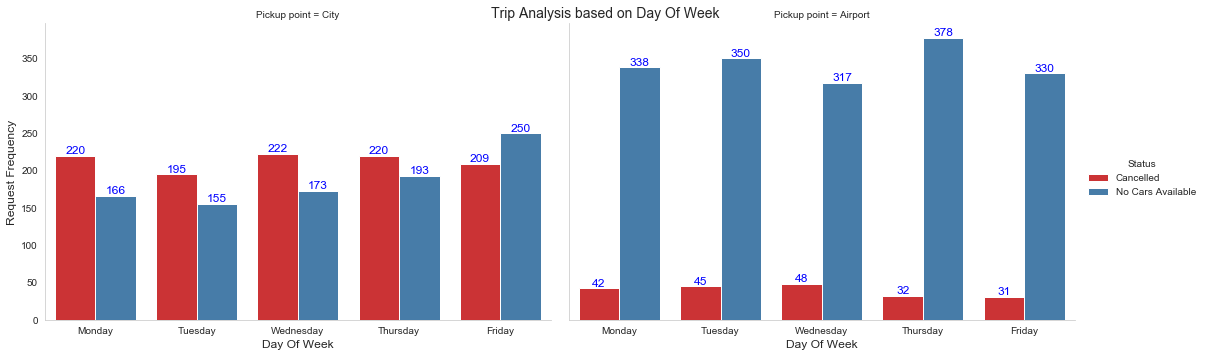

In [13]:
# Since there are only week days in the data provided and no week ends, have only considered the week days for sorting
order_days = ['Monday','Tuesday','Wednesday','Thursday','Friday']

filter_trip_status_df = uber[(uber['Status'] == 'Cancelled') | (uber['Status'] == 'No Cars Available')]

plot = sns.catplot(x="Request dayofweek", col= 'Pickup point', hue="Status", palette='Set1', kind="count", 
                   data=filter_trip_status_df, aspect=1.5, order=order_days);

plot.fig.suptitle('Trip Analysis based on Day Of Week', fontsize=14)
plot.set_xlabels('Day Of Week', fontsize=12)
plot.set_ylabels('Request Frequency', fontsize=12)

# print the counts

for i in np.arange(2):
    ax = plot.facet_axis(0,i)
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', 
                 va='bottom')

plt.show()

Following can be inferred from the above plots
    - For trips from city - airport, except for friday, cancelled trips are more for all other days of week
    - For trips from airport - city, for all days there are more number of No Cars Available

Hence, day of week does not differ from the conclusion derived in Step 2 above.

#### <b>Step 4 - Analyse the request frequency of cars for Cancelled Trips from airport & city for all timeslots.

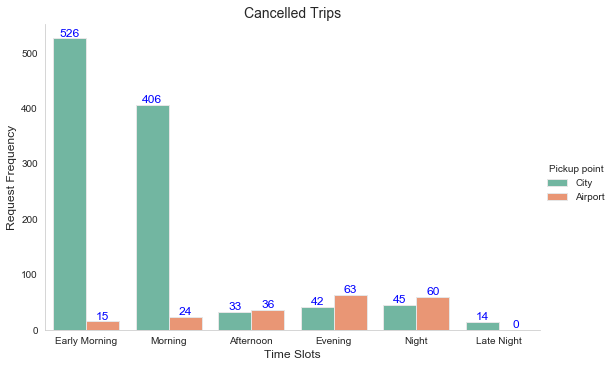

In [14]:
# The order of display of time slot
order_timeslot = ['Early Morning', 'Morning', 'Afternoon', 'Evening', 'Night', 'Late Night']

cancelled_df = uber[(uber['Status'] == 'Cancelled')]

plot = sns.catplot(x="Request timeslot", hue="Pickup point", kind="count", palette="Set2", edgecolor=".9", aspect=1.5, 
            data=cancelled_df, order = order_timeslot);
plt.title('Cancelled Trips', fontsize = 14)
plt.ylabel("Request Frequency", fontsize = 12)
plt.xlabel("Time Slots", fontsize = 12)

# print the count

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

Above graph shows that maximum number of cancellations happen for trips from city - airport, during the hours of Early Morning followed by Morning hours i.e., between 4:00 AM and 11:59 AM. <br>

<b>Step 5 - Identify the approximate hour when more trips are cancelled during the identified timeslots and pickup point. 

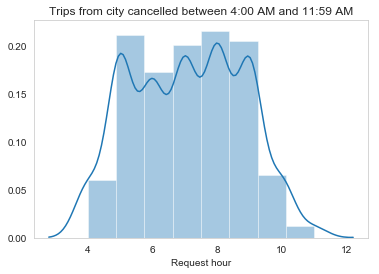

In [15]:
morning_cancellation_df = cancelled_df[(((cancelled_df['Request timeslot'] == 'Early Morning') 
                                        | (cancelled_df['Request timeslot'] == 'Morning')) 
                                        & (cancelled_df['Pickup point']=='City'))]

plt.title('Trips from city cancelled between 4:00 AM and 11:59 AM')
sns.distplot(morning_cancellation_df['Request hour'], bins=8)
plt.show()

The plot above shows that the number of cars cancelled is more around 8:00 AM, followed by 5:00 AM, 9:00 AM and 7:00 AM.

<b>Step 6 - Analyse the request frequency for Non Available Cars from airport & city for all timeslots. 

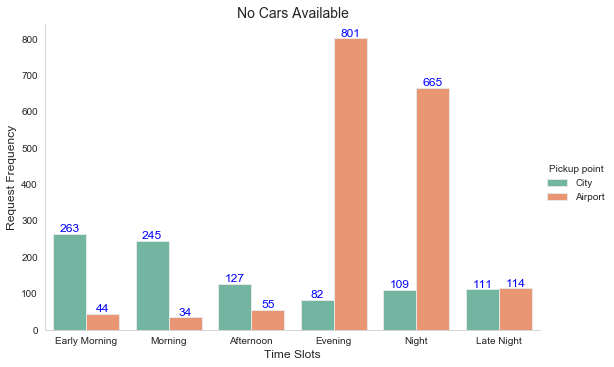

In [16]:
no_cars_available_df = uber[(uber['Status'] == 'No Cars Available')]

plot = sns.catplot(x="Request timeslot", hue="Pickup point", kind="count", palette="Set2", edgecolor=".9", aspect = 1.5, 
            data=no_cars_available_df, order = order_timeslot)

plt.title('No Cars Available', fontsize = 14)
plt.ylabel('Request Frequency', fontsize = 12)
plt.xlabel('Time Slots', fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

The above graph shows that maximum number of cars not available are from airport - city, during the evening hours followed by night ie between 4:00 PM and 11:59 PM

<b>Step 7 - Identify the approximate hour when more cars are unavailable during the identified timeslots and pickup point.

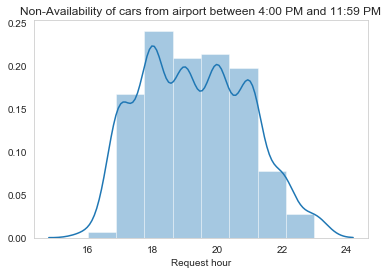

In [17]:
evening_unavailable_cars_df = no_cars_available_df[(((no_cars_available_df['Request timeslot'] == 'Evening') 
                                                     | (no_cars_available_df['Request timeslot'] == 'Night')) 
                                                    & (no_cars_available_df['Pickup point'] == 'Airport'))]
plt.title('Non-Availability of cars from airport between 4:00 PM and 11:59 PM') 
sns.distplot(evening_unavailable_cars_df['Request hour'], bins=8) 
plt.show()

The above plot shows that more number of cars are unavailable around 6:00 PM followed by 8:00 PM, 7:00 PM, 9:00 PM and 5:00 PM

Hence, the most pressing problem is as follows :
    - More cars are cancelled from city - airport, for timeslots between 4:00 AM and 11:59 AM
    - More cars are unavailable from airport - city, for timeslots between 4:00 PM and 11:59 PM

##### Supply demand gap can be calculated as follows :
    - Demand = Number of cars requested
    - Supply = Cars that completed the trips.
    - Supply Demand Gap = Cancelled cars plus unavailable cars

In [18]:
# Create a new column to determine supply vs supply demand gap
# function returns the value Supply or Supply Demand Gap based on the trip status

def setSupplyorSupplyDemandGap(x):
    if x == 'Trip Completed':
        return 'Supply'
    else:       
        return 'Supply demand gap'
    
uber['Supply demand gap'] = uber['Status'].apply(setSupplyorSupplyDemandGap)
uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Request hour,Request timeslot,Request dayofweek,Supply demand gap
0,619,Airport,1,Trip Completed,2016-07-11 11:51:00,11,Morning,Monday,Supply
1,867,Airport,1,Trip Completed,2016-07-11 17:57:00,17,Evening,Monday,Supply
2,1807,City,1,Trip Completed,2016-07-12 09:17:00,9,Morning,Tuesday,Supply
3,2532,Airport,1,Trip Completed,2016-07-12 21:08:00,21,Night,Tuesday,Supply
4,3112,City,1,Trip Completed,2016-07-13 08:33:16,8,Morning,Wednesday,Supply


<b>Step 8 - Analyse the demand for cabs for each timeslots for trips from airport and city.</b>   

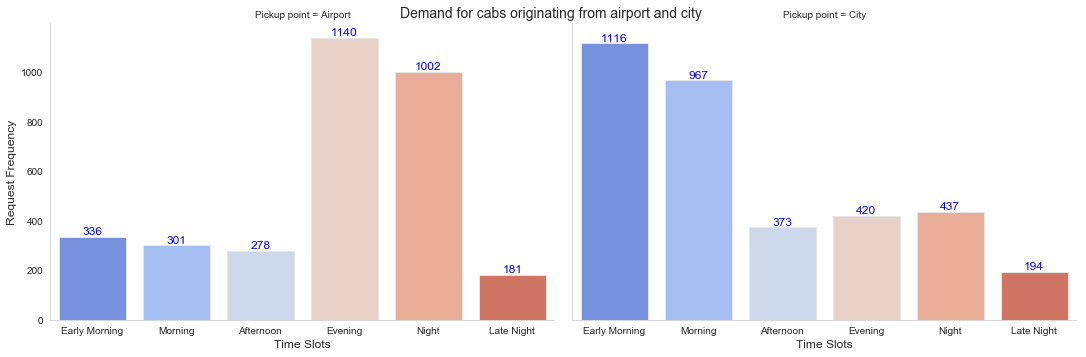

In [19]:
plot = sns.catplot(x='Request timeslot', col="Pickup point", kind="count", palette="coolwarm", edgecolor=".9", aspect = 1.5, 
          data=uber, order = order_timeslot)

plot.fig.suptitle('Demand for cabs originating from airport and city', fontsize=14)
plot.set_xlabels('Time Slots', fontsize=12)
plot.set_ylabels('Request Frequency', fontsize=12)

# print the counts

for i in np.arange(2):
    ax = plot.facet_axis(0,i)
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', 
                 va='bottom')

plt.show()

Irrespective of the trip status, following can be deduced from the above plots :  

    - For airport pickups, demand is more during the evening and night hours
    - For city pickups, demand is more during the early morning and morning

<b>Step 9 - Find the time slots when the highest supply demand gap exists

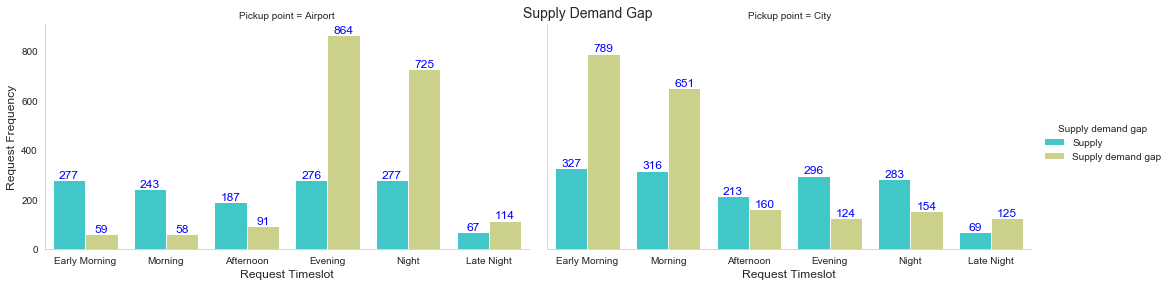

In [20]:
plot = sns.catplot(x="Request timeslot", hue="Supply demand gap", col = 'Pickup point', data=uber, palette='rainbow', 
            kind="count", height=4, aspect = 1.8, order = order_timeslot);

plot.fig.suptitle('Supply Demand Gap', fontsize=14)
plot.set_xlabels('Request Timeslot', fontsize=12)
plot.set_ylabels('Request Frequency', fontsize=12)

# print the count

for i in np.arange(2):
    ax = plot.facet_axis(0,i)
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', 
                 va='bottom')
        
plt.show()

###### The above plot shows the following :
    
    - Supply demand gap is more in the evening (4:00 PM to 7:59 PM) and night (8:00 PM to 11:59 PM) for trips from Airport
      to City.
    - Supply demand gap is more in the early morning (4:00 AM to 7:59 AM) and morning (8:00 AM to 11:59 AM) for trips from
      City to Airport     

<b>Step 10 - Find the types of requests (city-airport or airport-city) for which the gap is the most severe in the identified 
        time slots   

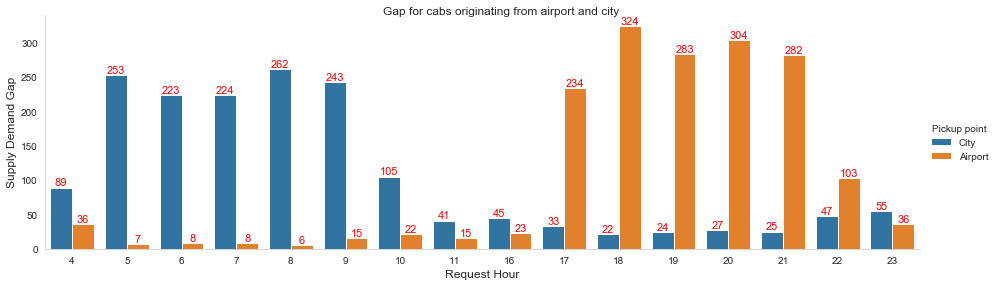

In [21]:
# filter based on the request time slots and supply demand gap

most_severe_gap_df = uber[((uber['Request timeslot'] == 'Evening') |
                           (uber['Request timeslot'] == 'Night') | 
                           (uber['Request timeslot'] == 'Early Morning') | 
                           (uber['Request timeslot'] == 'Morning')) & 
                          (uber['Supply demand gap'] == 'Supply demand gap')] 

plot = sns.catplot(x="Request hour", hue="Pickup point", data=most_severe_gap_df, kind="count", 
            height=4, aspect = 3.2)

plot.fig.suptitle('Gap for cabs originating from airport and city', fontsize=12)
plot.set_xlabels('Request Hour', fontsize=12)
plot.set_ylabels('Supply Demand Gap', fontsize=12)

# print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=11, color='red', ha='center', va='bottom')

plt.show()

The above plot shows that the most severe supply demand gap is for the trip request from Airport - City, between 6:00 PM to 9:00 PM

<b> Analysis Conclusion : </b>
    - The supply demand gap for cab requests from airport to city is more during evening and night hours, maximizing at 
      6:00 PM
    - The supply demand gap for cab requests from city to airport is more during early morning and morning hours, maximizing 
      at 8:00 AM
    - Most severe supply demand gap is for trip from airport to city between 6:00 PM to 9:00 PM, maximizing at 6:00 PM